In [1]:
from yucca.image_processing.transforms.Spatial import Spatial
from yucca.image_processing.transforms.BiasField import BiasField
from yucca.image_processing.transforms.Noise import AdditiveNoise, MultiplicativeNoise
from yucca.image_processing.transforms.Ghosting import MotionGhosting
from yucca.image_processing.transforms.Ringing import GibbsRinging
import matplotlib.pyplot as plt
from nibabel.testing import data_path
import nibabel as nib
import os
from copy import deepcopy
import numpy as np
np.random.seed(420);

In [2]:
#We use a publicly available sample from Nibabel
example_file = os.path.join(data_path, 'example4d.nii.gz')
im = nib.load(example_file)
imarr = im.get_fdata()[:,:,:,0]

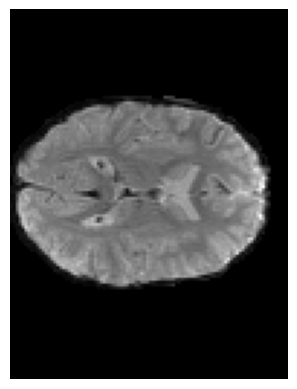

In [3]:
plt.imshow(imarr[:,:,12], cmap='gray')
plt.axis('off');

In [4]:
#Convert it to the format expected of the transforms 
#a dict of {"image": image, "seg": segmentation}
#with samples for dims (b, c, x, y, z) for 3D or (b, c, x, y) for 2D
imarr = imarr[np.newaxis, np.newaxis]
seg = np.zeros(imarr.shape)
datadict = {"image": imarr, "seg": seg}

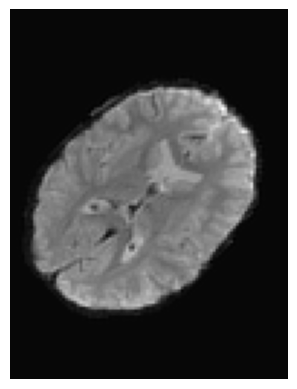

In [5]:
#Applying Rotation
tform = Spatial(do_rot = True, 
              x_rot_in_degrees=(0, 0),
              y_rot_in_degrees=(0, 0),
              z_rot_in_degrees=(45, 45))
im_tformed = tform(**deepcopy(datadict))
plt.imshow(im_tformed["image"][0, 0, :, :, 12], cmap='gray')
plt.axis('off');


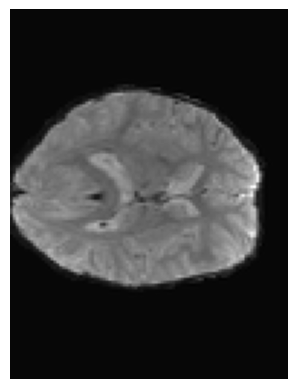

In [6]:
#Applying Deformation
tform = Spatial(do_deform= True, 
                deform_alpha=(700, 700),
                deform_sigma=(10, 10))
im_tformed = tform(**deepcopy(datadict))
plt.imshow(im_tformed["image"][0, 0, :, :, 12], cmap='gray')
plt.axis('off');

In [7]:
#Applying Scaling
tform = Spatial(do_scale = True, 
                scale_factor=(1.5, 1.5))
im_tformed = tform(**deepcopy(datadict))
plt.imshow(im_tformed["image"][0, 0, :, :, 12], cmap='gray')
plt.axis('off');

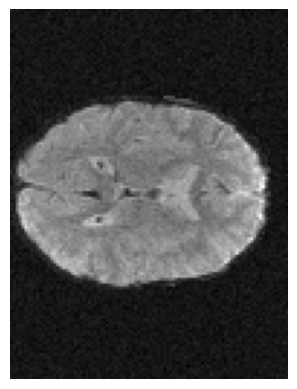

In [8]:
#Applying Additive Noise
tform = AdditiveNoise(p_per_sample=1, mean=(0, 0),
                      sigma = (25, 25))
im_tformed = tform(**deepcopy(datadict))
plt.imshow(im_tformed["image"][0, 0, :, :, 12], cmap='gray')
plt.axis('off');

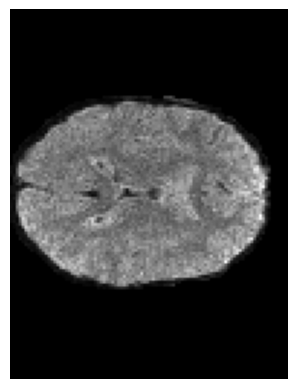

In [9]:
#Applying Multiplicative Noise
tform = MultiplicativeNoise(p_per_sample=1, mean=(0, 0),
                      sigma = (0.1, 0.1))
im_tformed = tform(**deepcopy(datadict))
plt.imshow(im_tformed["image"][0, 0, :, :, 12], cmap='gray')
plt.axis('off');

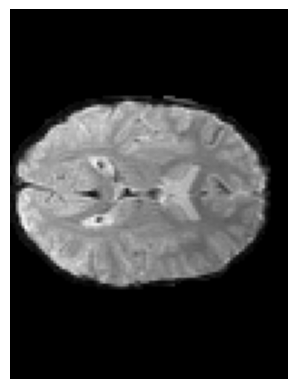

In [10]:
#Applying Bias Field
tform = BiasField(p_per_sample=1)
im_tformed = tform(**deepcopy(datadict))
plt.imshow(im_tformed["image"][0, 0, :, :, 12], cmap='gray')
plt.axis('off');

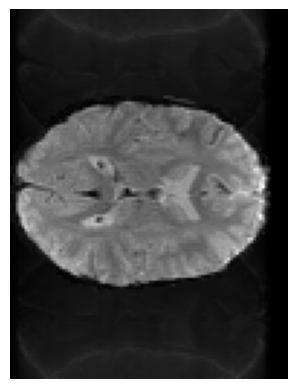

In [11]:
#Applying Motion Ghosting 
tform = MotionGhosting(p_per_sample=1, alpha=(0.6, 0.6),
                        numReps=(3, 4),
                       dims=(0, 1))
im_tformed = tform(**deepcopy(datadict))
plt.imshow(im_tformed["image"][0, 0, :, :, 12], cmap='gray')
plt.axis('off');

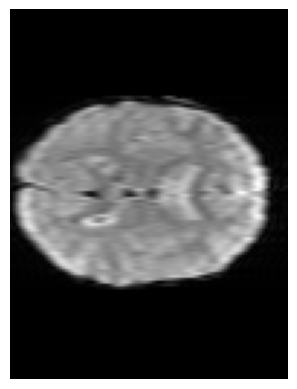

In [12]:
#Applying Gibbs Ringing 
tform = GibbsRinging(p_per_sample=1, cutFreq=(30, 36),
                     dim = (0, 1))
im_tformed = tform(**deepcopy(datadict))
plt.imshow(im_tformed["image"][0, 0, :, :, 12], cmap='gray')
plt.axis('off');

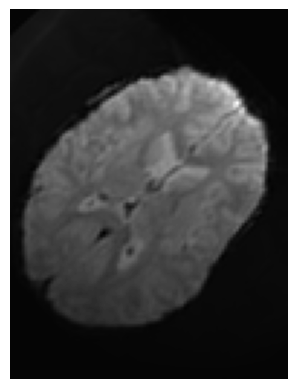

In [13]:
#Applying all augmentations subsequently
tform = GibbsRinging(p_per_sample=1, cutFreq=(64, 68),
                     dim = (0, 1))
tform2 = MotionGhosting(p_per_sample=1, alpha=(0.8, 0.8),
                        numReps=(3, 4),
                       dims=(0, 1))
tform3 = BiasField(p_per_sample=1)
tform4 = Spatial(do_rot = True, 
              x_rot_in_degrees=(0, 0),
              y_rot_in_degrees=(0, 0),
              z_rot_in_degrees=(45, 45))
tform5 = Spatial(do_deform= True, 
                deform_alpha=(700, 700),
                deform_sigma=(14, 14))
tform6 = Spatial(do_scale = True, 
                scale_factor=(0.9, 0.9))
tform7 = AdditiveNoise(p_per_sample=1, mean=(0, 0),
                      sigma = (0.01, 0.01))
tform8 = MultiplicativeNoise(p_per_sample=1, sigma=(0.01, 0.01))
im_tformed = tform(**deepcopy(datadict))
im_tformed = tform2(**im_tformed)
im_tformed = tform3(**im_tformed)
im_tformed = tform4(**im_tformed)
im_tformed = tform5(**im_tformed)
im_tformed = tform6(**im_tformed)
im_tformed = tform7(**im_tformed)
im_tformed = tform8(**im_tformed)

plt.imshow(im_tformed["image"][0, 0, :, :, 12], cmap='gray')
plt.axis('off');